COMP309-2021-T2

Tutorial 7

Feature Construction and Data Imputation

Baligh Al-Helali


**Introduction**

In this notebook we present the following:
1. Feature Construction
 
  a) Data loading 

  b) PCA 

  c) ICA 

  d) GP-based construction
  

2. Handling Missing Data

  a) Loading and exploring data
  
  b) The deletion approach
    - Deleting the incomplete features
    - Deleting the incomplete instances

  c) Handling missing values using pandas
    - Simple imputation using pandas
    - Interpolation imputation using pandas
    
  d) Handling missing values using sklearn
    - Simple imputation using sklearn
    - KNN-based imputation using skearn
    - Iterative imputation using skearn

  e) Applying the learned models to incomplete test data
    1. Preparing/encoding the test data
    2. Applying the learned imputer to complete the test data
    3. Perform classification considering the imputed data


**Theses tasks are done using transformers**

The main methods of such transformers are: 
- transformer.fit()
- transformer.transform()
- transformer.fit_transform()

**Note that the analysis and fitting(training) is based only on the train dataset.** 

**After that the learned transformations are applied to the test data.**

Dont worry! You will know how to do that by examples:) 



In [71]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import numpy as np

#**Feature Construction**

## **Load the dataset**

In [72]:
df=sns.load_dataset('iris')
df.head()

,sepal_length,sepal_width,petal_length,petal_width,species
0,5.1,3.5,1.4,0.2,setosa
1,4.9,3.0,1.4,0.2,setosa
2,4.7,3.2,1.3,0.2,setosa
3,4.6,3.1,1.5,0.2,setosa
4,5.0,3.6,1.4,0.2,setosa


Seperate the target variable 

In [73]:
X=df[df.columns[1:-1]]
y=df[df.columns[-1]]

In [75]:
# Show the number of instances per class
y.value_counts()

virginica     50
setosa        50
versicolor    50
Name: species, dtype: int64

Split data

In [76]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42, stratify=y)

## **PCA**

###Standardize the Data

PCA is effected by scale so you need to scale the features in your data before applying PCA. Scaling is very important for PCA because PCA is solved via the Singular Value Decomposition, which finds linear subspaces which best represent your data in the squared sense. 

We will use StandardScaler to help you standardize the dataset’s features onto unit scale (mean = 0 and variance = 1) which is a requirement for the optimal performance of many machine learning algorithms. 

In [77]:
#Check before standerization
X_train.head()

,sepal_width,petal_length,petal_width
98,2.5,3.0,1.1
68,2.2,4.5,1.5
19,3.8,1.5,0.3
143,3.2,5.9,2.3
99,2.8,4.1,1.3


In [78]:
#Now lets apply 1-1 scale transformer 
#1) import the module
from sklearn.preprocessing import StandardScaler
#2) define the model
scaler=StandardScaler()
#3) fit the model 
scaler.fit(X_train)
#4)transform the data
X_train_ss = scaler.transform(X_train)
#3 and 4 could be combined 
#X_train_ss = SS.fit_transform(X_train)

In [79]:
#Now lets perfrom pca 
#Steps are similar to the scale transformer
#1) import the module
from sklearn.decomposition import PCA
#2) define the model
pca = PCA(n_components=2)   # n_components means the pca transformation constructs two features
#3) fit the model
pca.fit(X_train_ss)
#4)transform the data
pca_train = pca.transform(X_train_ss)
#3 and 4 could be combined 
#pca_train = pca.fit_transform(X_train_ss)
#print the output, which is a matrix of only two features
pca_train

array([[-0.09953905, -1.27195338],
       [-1.24517682, -1.511778  ],
       [ 2.23995982,  0.82850939],
       [-1.56980436,  1.02026044],
       [-0.41457825, -0.43457392],
       [-1.48337778,  0.51976305],
       [ 1.80491446, -0.66531921],
       [ 2.2865126 ,  0.80241998],
       [ 1.58636569, -1.04325442],
       [-1.57485976,  0.53649337],
       [-1.02405341,  0.79039215],
       [ 1.67236368, -0.84124212],
       [ 1.59852867, -0.81367846],
       [-0.64319088, -0.09769186],
       [-0.48087711, -1.36371108],
       [-1.18937041,  0.83468613],
       [ 1.77558005,  0.07411321],
       [ 1.77052465, -0.40965385],
       [-1.57691193,  1.27445155],
       [-0.7463603 ,  0.66930422],
       [ 1.81249756,  0.06033139],
       [-1.21326777, -0.32697549],
       [-1.83328232,  0.63296616],
       [-1.95872552,  0.20285214],
       [-0.19602948, -0.05663871],
       [ 1.93288536,  0.00667834],
       [ 2.07049154,  0.66636831],
       [ 2.31632254,  1.04282927],
       [-0.61886493,

### Visualisation

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


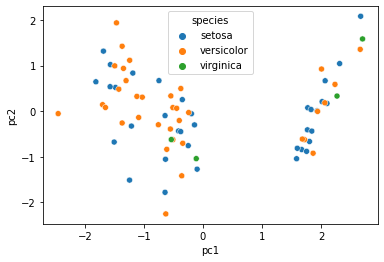

In [80]:
#format and visualise the transformed training data
df_pca_train = pd.DataFrame(data = pca_train, columns = ['pc1', 'pc2'])
df_pca_train['species']=y_train
sns.scatterplot('pc1', 'pc2', hue=df_pca_train['species'], data=df_pca_train)

* **Transform test data**

In [81]:
#Here we only apply the learned transformers to transform the test data, NO fit is used
#1- First apply the scaler that has been built based on the training data to scale the test data
X_test_ss = scaler.transform(X_test)
#2- Second apply the pca transformation that has been built based on the training data to transfer the scaled test data
pca_test = pca.transform(X_test_ss) 

###Classification

In [146]:
# Performing classification based on the orignal data
from sklearn.metrics import accuracy_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
#clf=SVC()
clf.fit(X_train, y_train)
print("Accuracy before transformation  = ", accuracy_score(clf.predict(X_test), y_test))

Accuracy before transformation  =  0.9111111111111111


In [147]:
# Performing classification using the pca-based transformed data
clf.fit(pca_train, y_train)
print("Accuracy after pca transformation  = ", accuracy_score(clf.predict(pca_test), y_test))

Accuracy after pca transformation  =  0.9111111111111111


##ICA

In [148]:
#Now lets apply ica
#Steps are similar to the scaler and pca transformers
from sklearn.decomposition import FastICA
ica=FastICA(n_components=2)
ica_train = ica.fit_transform(X_train_ss)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


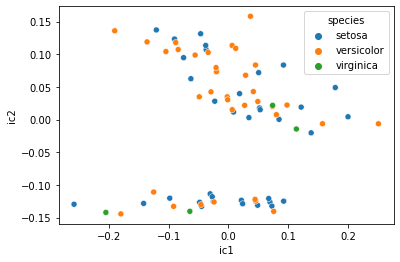

In [149]:
# Visualisation using the ica-based transformed data
df_ica_train = pd.DataFrame(data = ica_train, columns = ['ic1', 'ic2'])
df_ica_train['species']=y_train
sns.scatterplot('ic1', 'ic2', hue=df_ica_train['species'], data=df_ica_train)

In [150]:
# Transform test data using ica
ica_test = ica.transform(X_test_ss)

In [151]:
# Performing classification using the ica-based transformed data
clf.fit(ica_train, y_train)
print("Accuracy after ica transformation  = ", accuracy_score(clf.predict(ica_test), y_test))

Accuracy after ica transformation  =  0.9333333333333333


## GP transformers 

In [152]:
# Might need to install the package for genetic programming (gp) 
!pip install gplearn

In [153]:
#Since this package does not work when the target variable is string, an encoder is used to convert it 
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
label_encoded = le.fit_transform(y_train)
label_encoded

array([1, 1, 0, 2, 1, 2, 0, 0, 0, 2, 2, 0, 0, 1, 1, 2, 0, 0, 2, 1, 0, 2,
       2, 2, 1, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 1, 2, 2, 0, 2, 0, 2, 0,
       2, 1, 0, 2, 1, 2, 1, 0, 1, 2, 1, 2, 0, 1, 0, 1, 1, 1, 2, 1, 1, 2,
       2, 0, 2, 1, 1, 2, 0, 2, 2, 1, 0, 2, 2, 0, 0, 2, 2, 2, 0, 2, 1, 2,
       2, 0, 1, 1, 1, 1, 1, 0, 2, 1, 2, 0, 0, 1, 0, 1, 0])

In [154]:
#Now lets apply pca
#Steps are similar to the scale, pca, and ica transformers
from gplearn.genetic import SymbolicTransformer
gp = SymbolicTransformer(n_components=2)
gp.fit(X_train_ss, label_encoded)
gp_train = gp.transform(X_train_ss)

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


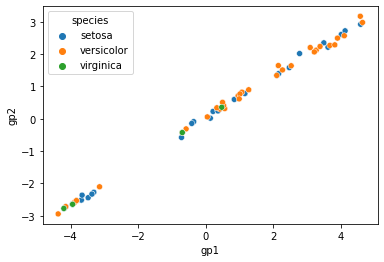

In [155]:
# Visualisation using the gp-based transformed data
df_gp_train = pd.DataFrame(data = gp_train, columns = ['gp1', 'gp2'])
df_gp_train['species']=y_train
sns.scatterplot('gp1', 'gp2', hue=df_gp_train['species'], data=df_gp_train)

In [156]:
# Transform test data using gp 
# Then, performing classification using the ica-based transformed data
gp_test = gp.transform(X_test_ss)
df_gp_test = pd.DataFrame(data = gp_test, columns = ['gp1', 'gp2'])
df_gp_test['species']=y_test
clf.fit(gp_train, y_train)
accuracy_score(clf.predict(gp_test), y_test)

0.9333333333333333

---


# **Data Imputation**

The methods we are showing:

- Deleting the columns with missing data
- Deleting the rows with missing data
- Simple imputation
- Advanced imputation


## Loadig and exploring the data

In [119]:
import pandas as pd
#Or load titanic data that are alraedy split into train and test data sets according to https://www.kaggle.com/c/titanic/data
# But the test data of kaggle does not have labels
#Therefore we will load  the whole data from a data repository then split it latter
titanic_data=pd.read_csv("https://www.openml.org/data/get_csv/16826755/phpMYEkMl.csv", na_values=['?']) #yo
titanic_data.head()

,pclass,survived,name,sex,age,sibsp,parch,ticket,fare,cabin,embarked,boat,body,home.dest
0,1,1,"Allen, Miss. Elisabeth Walton",female,29.0000,0,0,24160,211.3375,B5,S,2,NaN,"St Louis, MO"
1,1,1,"Allison, Master. Hudson Trevor",male,0.9167,1,2,113781,151.5500,C22 C26,S,11,NaN,"Montreal, PQ / Chesterville, ON"
2,1,0,"Allison, Miss. Helen Loraine",female,2.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"
3,1,0,"Allison, Mr. Hudson Joshua Creighton",male,30.0000,1,2,113781,151.5500,C22 C26,S,NaN,135.0,"Montreal, PQ / Chesterville, ON"
4,1,0,"Allison, Mrs. Hudson J C (Bessie Waldo Daniels)",female,25.0000,1,2,113781,151.5500,C22 C26,S,NaN,NaN,"Montreal, PQ / Chesterville, ON"


**Values considered “missing”**

There are many ways to represent missing values in both the dataset file and the python pandas. 

Missing value in the dataset itself can be a blank entry, '?', or somethingelse tat data collecters agreed on to represent unopsorved data. 
To tell panda what to consider as missing values we use na_values=['?']. Note we can use other inputs based on the underlying dataset.

On the other hand, pandas can represent missing values using different forms. As can be seen above, "NaN" is the default missing value marker, however, we need to be able to easily detect this value with data of different types: floating point, integer, boolean, and general object. In many cases, however, some other forms can refer to missing values such as None “missing” or “not available”, “NA", or (-)inf .


In [120]:
#We will not be working with all features, so let's drop the ones that we will not consider.
titanic_data.drop(['name','ticket', 'embarked', 'boat' ,'body' ,'home.dest'], axis=1, inplace=True)

Now we will split the data to train and test subsets as **ONLY** the training data will be used to learn the imputers then the learnt models are applied to the test data

In [121]:
from sklearn.model_selection import train_test_split
y=titanic_data['survived']
X=titanic_data.drop(['survived'], axis=1)
X_titanic_train, X_titanic_test, y_titanic_train, y_titanic_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [122]:
#Now if we perform classification it might not work for most classifiers
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier()
#clf=SVC()
clf.fit(X_titanic_train, y_titanic_train)


ValueError: ignored

In [123]:
# We need the upgraded sklearn to accept the parameters for encoders
import sklearn
!pip install -U scikit-learn
print('The scikit-learn version is {}.'.format(sklearn.__version__))

The scikit-learn version is 0.24.2.


**There is a problem that some features contain string values, namely the features "sex" and "cabin", so lets encode these features**

In [124]:
import numpy as np
# Encoding categorical features with preserving the missing values in incomplete features
from sklearn.preprocessing import OrdinalEncoder
encoder_sex = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan)
X_titanic_train_encoded=X_titanic_train.copy()
X_titanic_train_encoded['sex'] = encoder_sex.fit_transform(X_titanic_train_encoded['sex'].values.reshape(-1, 1))

#Now lets encode the incomplete Cabin feature
encoder_cabin = OrdinalEncoder(handle_unknown = 'use_encoded_value', unknown_value=np.nan) #You can use the same encoder for both but we use two for the sake of clarfication
X_titanic_train_encoded['cabin'] = encoder_cabin.fit_transform(X_titanic_train_encoded['cabin'].values.reshape(-1, 1).astype(str))
#get the code of the "nan" value for the cabin categorical feature
cabin_nan_code=encoder_cabin.transform([['nan']])[0][0]
#print(cabin_nan_code)
#Now, retrive the nan values to be missing in the encoded data
X_titanic_train_encoded['cabin'].replace(cabin_nan_code,np.nan,inplace=True)


X_titanic_train_encoded is the encoded incomplete training data

In [125]:
#Check the types of the encoded data, no object features
X_titanic_train_encoded.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 916 entries, 1214 to 1126
Data columns (total 7 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   pclass  916 non-null    int64  
 1   sex     916 non-null    float64
 2   age     729 non-null    float64
 3   sibsp   916 non-null    int64  
 4   parch   916 non-null    int64  
 5   fare    915 non-null    float64
 6   cabin   204 non-null    float64
dtypes: float64(4), int64(3)
memory usage: 57.2 KB


In [126]:
# As the data has no strings/object snow, let's try performing classification using the encoded data
clf.fit(X_titanic_train_encoded, y_titanic_train)

ValueError: ignored

**Note the error:ValueError: Input contains NaN, infinity or a value too large for dtype('float32').**

**Therefore, we need to handele the missing values before performing the classification**

***Next methods could be used for handeling missing values***

Lets show the number of missing values in each feature of the encoded train data



In [127]:
print("The number of missing values ")
print(X_titanic_train_encoded.isnull().sum())

The number of missing values 
pclass      0
sex         0
age       187
sibsp       0
parch       0
fare        1
cabin     712
dtype: int64


We have three incomplete features "age", "cabin", and "fare"



## The deletion approach

### Deleting the incomplete features

In [128]:
X_titanic_train_complete=X_titanic_train_encoded.copy()
X_titanic_train_complete.dropna(axis=1, inplace=True)
X_titanic_train_complete

,pclass,sex,sibsp,parch
1214,3,1.0,0,0
677,3,1.0,0,0
534,2,0.0,0,0
1174,3,0.0,8,2
864,3,0.0,0,0
...,...,...,...,...
1095,3,0.0,0,0
1130,3,0.0,0,0
1294,3,1.0,0,0
860,3,0.0,0,0


**Notice the reduction in number of features**

In [129]:
#Check the number of missing values
print(X_titanic_train_complete.isnull().sum())

pclass    0
sex       0
sibsp     0
parch     0
dtype: int64


### Deleting the incomplete instances 

In [130]:
X_titanic_train_complete=X_titanic_train_encoded.copy()
X_titanic_train_complete.dropna(axis=0, inplace=True)  
#The difference is axis=0 instead of 1
X_titanic_train_complete

,pclass,sex,age,sibsp,parch,fare,cabin
39,1,1.0,48.0,0,0,50.4958,14.0
30,1,1.0,45.0,0,0,35.5000,145.0
242,1,0.0,33.0,0,0,27.7208,0.0
136,1,1.0,53.0,0,0,28.5000,68.0
3,1,1.0,30.0,1,2,151.5500,61.0
...,...,...,...,...,...,...,...
189,1,1.0,29.0,0,0,30.0000,113.0
252,1,1.0,61.0,1,3,262.3750,35.0
21,1,0.0,47.0,1,1,52.5542,101.0
276,1,1.0,57.0,1,0,146.5208,42.0


**Notice the reduction in the number of instances**

Another important point for the instance deletion approach is that there is a need to remove the target values (from y_train) that correspond to the incomplete (deleted) data instances

In [131]:
#Check the number of missing values
print(X_titanic_train_complete.isnull().sum())

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


**The deletion approach has several drawbacks. It reduces the availlable data, which limits the learning ability, especially when there are many missing values.**

**Furthermore, the approach of deleting incomplete instances is not practical for test data**

##Handling missing values using pandas


### Simple imputation using pandas

In [132]:
#Mean for numeric values
X_titanic_data_complete=X_titanic_train_encoded.copy()
X_titanic_data_complete['age']=X_titanic_data_complete['age'].fillna(X_titanic_data_complete['age'].mean())
X_titanic_data_complete['fare']=X_titanic_data_complete['fare'].fillna(X_titanic_data_complete['fare'].mean())
X_titanic_data_complete['cabin']=X_titanic_data_complete['cabin'].fillna(X_titanic_data_complete['cabin'].mean())
# Show the number of missing values
print(X_titanic_data_complete.isnull().sum())

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


In [133]:
X_titanic_data_complete.head()

,pclass,sex,age,sibsp,parch,fare,cabin
1214,3,1.0,29.102309,0,0,8.6625,73.27451
677,3,1.0,26.000000,0,0,7.8958,73.27451
534,2,0.0,19.000000,0,0,26.0000,73.27451
1174,3,0.0,29.102309,8,2,69.5500,73.27451
864,3,0.0,28.000000,0,0,7.7750,73.27451


###Using panda interpolation

In [134]:
X_titanic_data_complete=X_titanic_train_encoded.copy()
X_titanic_data_complete=X_titanic_data_complete.interpolate()
#The output is 'numpy.ndarray' so we convert it to dataframe for consistency
X_titanic_train_complete=pd.DataFrame(X_titanic_train_complete)
print(X_titanic_train_complete.isna().sum())

pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


## **Using sklearn imputer**

### Using sklearn simple imputer

In [161]:
from sklearn.impute import SimpleImputer
imputer = SimpleImputer()
X_titanic_train_complete = imputer.fit_transform(X_titanic_train_encoded)
#The output is 'numpy.ndarray' so we convert it to dataframe for consistency
X_titanic_train_complete=pd.DataFrame(X_titanic_train_complete, columns=X_titanic_train_encoded.columns)
print("The number of missing values :\n", X_titanic_train_complete.isnull().sum())

The number of missing values :
 pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


In [158]:
X_titanic_train_encoded

,pclass,sex,age,sibsp,parch,fare,cabin
1214,3,1.0,NaN,0,0,8.6625,NaN
677,3,1.0,26.0,0,0,7.8958,NaN
534,2,0.0,19.0,0,0,26.0000,NaN
1174,3,0.0,NaN,8,2,69.5500,NaN
864,3,0.0,28.0,0,0,7.7750,NaN
...,...,...,...,...,...,...,...
1095,3,0.0,NaN,0,0,7.6292,NaN
1130,3,0.0,18.0,0,0,7.7750,NaN
1294,3,1.0,28.5,0,0,16.1000,NaN
860,3,0.0,26.0,0,0,7.9250,NaN


The default strategy for sklearn simple imputer is the "mean", you can change it using the strategy parameter

In [162]:
imputer = SimpleImputer(strategy="median")
X_titanic_train_complete = imputer.fit_transform(X_titanic_train_encoded)
#The output is 'numpy.ndarray' so we convert it to dataframe for consistency
X_titanic_train_complete=pd.DataFrame(X_titanic_train_complete, columns=X_titanic_train_encoded.columns)
print("The number of missing values :\n", X_titanic_train_complete.isnull().sum())

The number of missing values :
 pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


### Using sklearn k-Nearest Neighbors imputer **(KNN)**

In [163]:
from sklearn.impute import KNNImputer
imputer = KNNImputer()
X_titanic_train_complete = imputer.fit_transform(X_titanic_train_encoded)
#The output is 'numpy.ndarray' so we convert it to dataframe for consistency
X_titanic_train_complete=pd.DataFrame(X_titanic_train_complete, columns=X_titanic_train_encoded.columns)
print("The number of missing values :\n", X_titanic_train_complete.isnull().sum())

The number of missing values :
 pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


In [164]:
#The default k for the KNN imputer is 5, you can change it as follows:
imputer = KNNImputer(n_neighbors=2)
X_titanic_train_complete = imputer.fit_transform(X_titanic_train_encoded)
#The output is 'numpy.ndarray' so we convert it to dataframe for consistency
X_titanic_train_complete=pd.DataFrame(X_titanic_train_complete, columns=X_titanic_train_encoded.columns)
print("The number of missing values :\n", X_titanic_train_complete.isnull().sum())

The number of missing values :
 pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


### Using sklearn iterative imputer **(MICE)**

In [165]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
imputer = IterativeImputer()
X_titanic_train_complete = imputer.fit_transform(X_titanic_train_encoded)
#The output is 'numpy.ndarray' so we convert it to dataframe for consistency
X_titanic_train_complete=pd.DataFrame(X_titanic_train_complete, columns=X_titanic_train_encoded.columns)
print("The number of missing values :\n", X_titanic_train_complete.isnull().sum())

The number of missing values :
 pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


You can change the default parameters of the iterative imputer. For example, you can set the number of iterations. Moreover, you can specify the estimator for estimating the missing values.

In [166]:
# Lets use DT as an estimator
from sklearn.tree import DecisionTreeRegressor
imputer = IterativeImputer(estimator=DecisionTreeRegressor())
X_titanic_train_complete = imputer.fit_transform(X_titanic_train_encoded)
#The output is 'numpy.ndarray' so we convert it to dataframe for consistency
X_titanic_train_complete=pd.DataFrame(X_titanic_train_complete, columns=X_titanic_train_encoded.columns)
print("The number of missing values :\n", X_titanic_train_complete.isnull().sum())

The number of missing values :
 pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


/usr/local/lib/python3.7/dist-packages/sklearn/impute/_iterative.py:686: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  " reached.", ConvergenceWarning)


## **Applying the learned models to incomplete test data**

### First, apply the encoders

In [141]:
#The learnt encoder_sex should be used to encode the test data, NOTE there is NO fit here, just transform
X_titanic_test_encoded=X_titanic_test.copy()
X_titanic_test_encoded['sex'] = encoder_sex.transform(X_titanic_test_encoded['sex'].values.reshape(-1, 1))

#The learnt encoder2 should be used to encode the test data, NOTE there is NO fit here, just transform
X_titanic_test_encoded['cabin'] = encoder_cabin.transform(X_titanic_test_encoded['cabin'].values.reshape(-1, 1).astype(str))
#Now, retrive the nan values to be missing in the encoded data
X_titanic_test_encoded['cabin'].replace(cabin_nan_code,np.nan,inplace=True)


### Seconed, use the learned imputer to estimate the missing values in the test data

In [167]:
print("The number of missing values in the test data before imputation :\n", X_titanic_test_encoded.isnull().sum())
X_titanic_test_complete = imputer.transform(X_titanic_test_encoded)
X_titanic_test_complete=pd.DataFrame(X_titanic_test_complete, columns=X_titanic_test_encoded.columns)
print("The number of missing values in the test data after imputation :\n", X_titanic_test_complete.isnull().sum())

The number of missing values in the test data before imputation :
 pclass      0
sex         0
age        76
sibsp       0
parch       0
fare        0
cabin     349
dtype: int64
The number of missing values in the test data after imputation :
 pclass    0
sex       0
age       0
sibsp     0
parch     0
fare      0
cabin     0
dtype: int64


### Finally, we can perform the classification using the imputed complete data.

In [145]:
#We use f-measure because the classes are not balanced
from sklearn.metrics import f1_score
from sklearn.ensemble import RandomForestClassifier
clf = RandomForestClassifier(random_state=0)
#clf=SVC()
clf.fit(X_titanic_train_complete, y_titanic_train)
print("F1 score after imputation = ", f1_score(clf.predict(X_titanic_test_complete), y_titanic_test))

F1 score after imputation =  0.7250000000000001
